In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             #KÜTÜPHANELERİN İMPORT EDİLMESİ
import seaborn as sns

In [82]:
df=pd.read_csv("eeg.csv")
print(df.info())                                     #DATASETİN OKUNMASI
                                                      #DATASETİN BİLGİLERİNİN GÖRÜNTÜLENMESİ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
AF3    14980 non-null float64
F7     14980 non-null float64
eye    14980 non-null object
F3     14980 non-null float64
FC5    14980 non-null float64
T7     14980 non-null float64
P7     14980 non-null float64
O1     14980 non-null float64
O2     14980 non-null float64
P8     14980 non-null float64
T8     14980 non-null float64
FC6    14980 non-null float64
F4     14980 non-null float64
F8     14980 non-null float64
AF4    14980 non-null float64
dtypes: float64(14), object(1)
memory usage: 1.7+ MB
None


In [83]:
df.head()                  # DATASETİN İLK 5 SATIRI GÖRÜNTÜLENMESİ

AF3       F7   eye       F3      FC5       T7       P7       O1  \
0  4329.23  4009.23  Open  4289.23  4148.21  4350.26  4586.15  4096.92   
1  4324.62  4004.62  Open  4293.85  4148.72  4342.05  4586.67  4097.44   
2  4327.69  4006.67  Open  4295.38  4156.41  4336.92  4583.59  4096.92   
3  4328.72  4011.79  Open  4296.41  4155.90  4343.59  4582.56  4097.44   
4  4326.15  4011.79  Open  4292.31  4151.28  4347.69  4586.67  4095.90   

        O2       P8       T8      FC6       F4       F8      AF4  
0  4641.03  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85  
1  4638.97  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10  
2  4630.26  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23  
3  4630.77  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41  
4  4627.69  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46

In [84]:
df.isnull().sum()           #BOŞ VERİLERİN SAYISI

AF3    0
F7     0
eye    0
F3     0
FC5    0
T7     0
P7     0
O1     0
O2     0
P8     0
T8     0
FC6    0
F4     0
F8     0
AF4    0
dtype: int64

In [85]:
print(df["eye"].value_counts())        #"eye" sutunu görüntülendi.

Open      8257
Closed    6723
Name: eye, dtype: int64


In [86]:
df.eye=[1 if each =="Open" else 0 for each in df.eye]          # open değerlerine 1
                                                                # closed değerleri 0 verildi

In [87]:
df.info()                                                       #dataset bilgileri görüntülendi.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
AF3    14980 non-null float64
F7     14980 non-null float64
eye    14980 non-null int64
F3     14980 non-null float64
FC5    14980 non-null float64
T7     14980 non-null float64
P7     14980 non-null float64
O1     14980 non-null float64
O2     14980 non-null float64
P8     14980 non-null float64
T8     14980 non-null float64
FC6    14980 non-null float64
F4     14980 non-null float64
F8     14980 non-null float64
AF4    14980 non-null float64
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [88]:
y = df["eye"].values
X = df.drop(['eye'], axis=1).values                        # x ve y değerleri belirlendi.

In [89]:
x=(X-np.min(X))/(np.max(X)-np.min(X))                     #normalizasyon min max yapıldı.

In [90]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()                                    #standarscaler fit edilmesi
X=Scaler.fit_transform(X)

In [91]:
X[0:3]                                                      

array([[ 0.00293429, -0.01170422,  0.56739848, -0.00320851,  0.24523598,
        -0.01978751, -0.00292998,  0.85256778,  0.00150884,  0.18774952,
         0.23350974,  0.03074472,  0.01712667, -0.0038339 ],
       [ 0.00108436, -0.1120522 ,  0.6713903 , -0.00311074,  0.00889307,
        -0.01960972, -0.00281695,  0.78224051, -0.00377123, -0.12210892,
         0.13849779,  0.0061918 ,  0.0145777 , -0.00548894],
       [ 0.00231631, -0.06742891,  0.70582915, -0.00163649, -0.13878526,
        -0.02066282, -0.00292998,  0.4848859 , -0.00521295, -0.24352928,
         0.11150275,  0.06781481,  0.01118458, -0.00461813]])

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)                                 #x_train ve y_train olarak bölündü.
print("y_test:",y_test.shape)

x_train: (11984, 14)
y_train: (11984,)
x_test: (2996, 14)
y_test: (2996,)


In [93]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
scores=[]

kf=KFold(n_splits=10,random_state=1)
mlpc=MLPClassifier(solver="lbfgs",activation="logistic",hidden_layer_sizes=(3,5))

for train_indexler,test_indexler in kf.split(x):
    mlpc.fit(x[train_indexler],y[train_indexler])
    score=mlpc.score(x[test_indexler],y[test_indexler])
    scores.append(score)                                           #kfold ve mlpc değerleri verildi. skorlar görüntülenip ortalama skor görüntülendi
    print(score)
    
print("ortalama score:",np.mean(scores))                              #mlpc fit edilip makineye öğretildi.

mlpc=MLPClassifier(random_state=1)
mlpc.fit(x_train,y_train)
y_pred=mlpc.predict(x_test)

0.43591455273698265
0.5834445927903872
0.3257676902536716
0.5433911882510013
0.44125500667556744
0.0
0.9559412550066756
0.41321762349799734
0.8751668891855807
0.937917222963952
ortalama score: 0.5512016021361815


In [94]:
print("mlpc score:",mlpc.score(x_test,y_test))  #mlpc skor hesaplandı

mlpc score: 0.5544058744993324


In [95]:
from sklearn.model_selection import GridSearchCV

mlpc_params={"alpha":[0.1,0.01,0.001,0.0001],
            "hidden_layer_sizes":[(10,10),(3,3,3),(100,100),(3,5,3)],
            "solver":["lbfgs","adam","sgd"]}                                  #mlpc için grid search değerleri verildi.

mlpc=MLPClassifier(activation="logistic",random_state=1)                      #mlpc fit edildi.

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  8.9min finished


In [96]:
print(mlpc_cv_model.best_params_)                      #mlpc için best params bastırıldı.

{'alpha': 0.1, 'hidden_layer_sizes': (10, 10), 'solver': 'lbfgs'}


In [97]:
mlpc_tuned=MLPClassifier(alpha=0.01,hidden_layer_sizes=(100,100),solver="adam").fit(x_train,y_train)
print("score:",mlpc_tuned.score(x_test,y_test))                            #mlpctuned fit edilme işlemi yapıldı.

score: 0.5544058744993324


In [98]:

import sklearn.metrics as metrics
                                                #metrics import edildi.


In [99]:
acc=metrics.accuracy_score(y_test,y_pred)                     #accuracy hesaplandı ve görüntülendi.
print("Accuracy:",acc)

Accuracy: 0.5544058744993324


In [100]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)                                                                 # confusion matrix görüntülendi.

[[   0 1335]
 [   0 1661]]


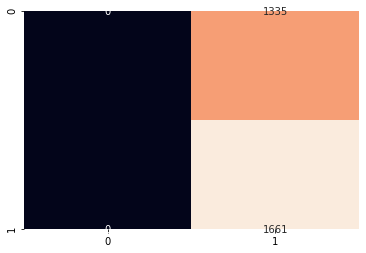

In [101]:
sns.heatmap(cm,cbar=False,annot=True,fmt="")                            #confusion matrix seaborn ile çizildi.

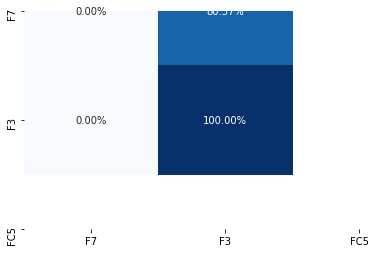

In [102]:
class_adlari=["F7","F3","FC5"]
sns.heatmap(cm/cm.sum(axis=1), annot=True, cbar=False, cmap="Blues",xticklabels=class_adlari,yticklabels=class_adlari,fmt=".2%")

In [103]:
f1=metrics.f1_score(y_test,y_pred,)
print("f1 score:",f1)                              #f1 skor hesaplandı.

f1 score: 0.713334764870088


In [104]:
cr=metrics.classification_report(y_test,y_pred)           # genel skorlar görüntülendi.
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1335
           1       0.55      1.00      0.71      1661

    accuracy                           0.55      2996
   macro avg       0.28      0.50      0.36      2996
weighted avg       0.31      0.55      0.40      2996



C:\Users\Esra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [106]:
#roc and auc
mlpc.fit(x_train,y_train)
probs=mlpc.predict_proba(x_test)
#print(probs)                                         #mlpc makineye öğretilip probs tanımlandı.
probs=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,probs)
auc_value=metrics.auc(fpr,tpr)

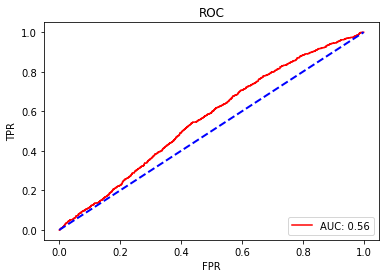

In [107]:
plt.title("ROC")
plt.plot(fpr,tpr,label="AUC: "+str(round(auc_value,2)),color="red")
plt.plot([0,1],[0,1],color="blue",lw=2,linestyle="--")                 #roc ve auc çizildi.
plt.legend(loc="lower right")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()